In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("clean.csv")

In [3]:
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<AxesSubplot:ylabel='Churn'>

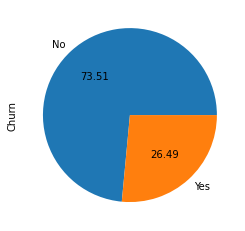

In [4]:
df.Churn.value_counts().plot(kind="pie",autopct="%0.2f")

In [5]:
df=df.drop("Unnamed: 0",axis=1)

In [6]:
obj_col = df.loc[:, df.dtypes == object].columns
obj_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [7]:
for i in obj_col:
    data = df[i].unique()
    print("Column: {} || {}".format(i,data))

Column: gender || ['Female' 'Male']
Column: Partner || ['Yes' 'No']
Column: Dependents || ['No' 'Yes']
Column: PhoneService || ['No' 'Yes']
Column: MultipleLines || ['No phone service' 'No' 'Yes']
Column: InternetService || ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity || ['No' 'Yes' 'No internet service']
Column: OnlineBackup || ['Yes' 'No' 'No internet service']
Column: DeviceProtection || ['No' 'Yes' 'No internet service']
Column: TechSupport || ['No' 'Yes' 'No internet service']
Column: StreamingTV || ['No' 'Yes' 'No internet service']
Column: StreamingMovies || ['No' 'Yes' 'No internet service']
Column: Contract || ['Month-to-month' 'One year' 'Two year']
Column: PaperlessBilling || ['Yes' 'No']
Column: PaymentMethod || ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column: Churn || ['No' 'Yes']


In [8]:
for i in obj_col:
    data = df[i].value_counts()
    print("Column: {} ||\n{}\n\n".format(i,data))

Column: gender ||
Male      3535
Female    3475
Name: gender, dtype: int64


Column: Partner ||
No     3617
Yes    3393
Name: Partner, dtype: int64


Column: Dependents ||
No     4911
Yes    2099
Name: Dependents, dtype: int64


Column: PhoneService ||
Yes    6330
No      680
Name: PhoneService, dtype: int64


Column: MultipleLines ||
No                  3363
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


Column: InternetService ||
Fiber optic    3090
DSL            2414
No             1506
Name: InternetService, dtype: int64


Column: OnlineSecurity ||
No                     3489
Yes                    2015
No internet service    1506
Name: OnlineSecurity, dtype: int64


Column: OnlineBackup ||
No                     3079
Yes                    2425
No internet service    1506
Name: OnlineBackup, dtype: int64


Column: DeviceProtection ||
No                     3086
Yes                    2418
No internet service    1506
Name: DeviceProtection, d

# Feature Selection

In [9]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
obj_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
for i in obj_col:
    le = LabelEncoder()
    df[i] =le.fit_transform(df[i])

In [13]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001069,-0.000583,0.010912,0.006370,-0.007799,-0.006107,-0.003143,-0.015145,-0.012045,0.001250,-0.006916,-0.005662,-0.008958,0.000780,-0.011497,0.015889,-0.012361,0.000879,-0.008694
SeniorCitizen,-0.001069,1.000000,0.016030,-0.211479,0.014456,0.008724,0.145621,-0.031066,-0.127982,-0.013398,-0.021174,-0.151088,0.030946,0.047029,-0.142890,0.155922,-0.036921,0.219131,0.101642,0.151270
Partner,-0.000583,0.016030,1.000000,0.451254,0.379564,0.019420,0.140133,0.003292,0.150372,0.152434,0.165035,0.126178,0.135781,0.128968,0.292330,-0.014856,-0.153504,0.095277,0.317021,-0.148670
Dependents,0.010912,-0.211479,0.451254,1.000000,0.161288,-0.000408,-0.027064,0.046046,0.151016,0.089719,0.079203,0.132310,0.045470,0.021293,0.239279,-0.110973,-0.039886,-0.114641,0.062762,-0.162366
tenure,0.006370,0.014456,0.379564,0.161288,1.000000,0.009217,0.341092,-0.026302,0.327588,0.372391,0.372635,0.324995,0.289941,0.296141,0.675876,0.003709,-0.367462,0.244194,0.825293,-0.353339
PhoneService,-0.007799,0.008724,0.019420,-0.000408,0.009217,1.000000,-0.019519,0.387380,-0.013990,0.024374,0.005034,-0.017958,0.056847,0.043477,0.003872,0.017017,-0.006624,0.249625,0.114222,0.011072
MultipleLines,-0.006107,0.145621,0.140133,-0.027064,0.341092,-0.019519,1.000000,-0.106444,0.006767,0.116575,0.121931,0.010384,0.174570,0.180860,0.108741,0.164971,-0.173869,0.432571,0.451510,0.040181
InternetService,-0.003143,-0.031066,0.003292,0.046046,-0.026302,0.387380,-0.106444,1.000000,-0.029011,0.036332,0.045177,-0.026600,0.108283,0.098053,0.102317,-0.136588,0.081012,-0.319423,-0.173540,-0.047169
OnlineSecurity,-0.015145,-0.127982,0.150372,0.151016,0.327588,-0.013990,0.006767,-0.029011,1.000000,0.184027,0.174864,0.284102,0.043283,0.055206,0.374122,-0.157104,-0.096837,-0.053041,0.254466,-0.288246
OnlineBackup,-0.012045,-0.013398,0.152434,0.089719,0.372391,0.024374,0.116575,0.036332,0.184027,1.000000,0.186649,0.194673,0.145971,0.135948,0.280295,-0.011890,-0.125415,0.120560,0.375430,-0.193979


In [14]:
df.corr()["Churn"]

gender             -0.008694
SeniorCitizen       0.151270
Partner            -0.148670
Dependents         -0.162366
tenure             -0.353339
PhoneService        0.011072
MultipleLines       0.040181
InternetService    -0.047169
OnlineSecurity     -0.288246
OnlineBackup       -0.193979
DeviceProtection   -0.176520
TechSupport        -0.281394
StreamingTV        -0.034312
StreamingMovies    -0.036802
Contract           -0.395968
PaperlessBilling    0.190518
PaymentMethod       0.107032
MonthlyCharges      0.194008
TotalCharges       -0.198362
Churn               1.000000
Name: Churn, dtype: float64

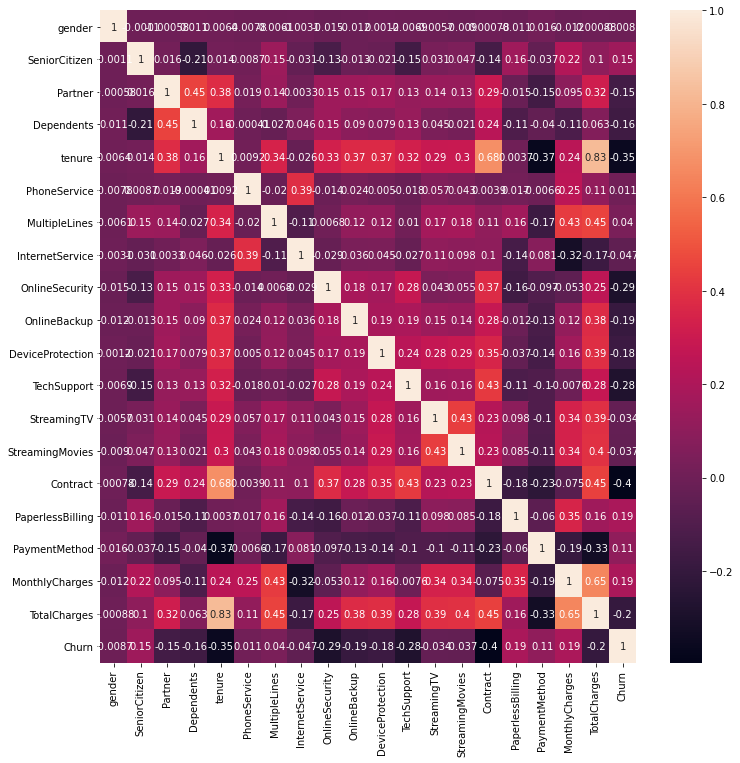

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [16]:
df.corr().sort_values("Churn")["Churn"]

Contract           -0.395968
tenure             -0.353339
OnlineSecurity     -0.288246
TechSupport        -0.281394
TotalCharges       -0.198362
OnlineBackup       -0.193979
DeviceProtection   -0.176520
Dependents         -0.162366
Partner            -0.148670
InternetService    -0.047169
StreamingMovies    -0.036802
StreamingTV        -0.034312
gender             -0.008694
PhoneService        0.011072
MultipleLines       0.040181
PaymentMethod       0.107032
SeniorCitizen       0.151270
PaperlessBilling    0.190518
MonthlyCharges      0.194008
Churn               1.000000
Name: Churn, dtype: float64

In [17]:
X = df.drop("Churn",axis=1)
y = df["Churn"]

# RFE

In [18]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

rfe = RFE(model, n_features_to_select=11) #Decision tree
fit = rfe.fit(X, y)

print(fit.n_features_,fit.support_,fit.ranking_)

11 [ True  True False  True  True False False  True  True  True False False
 False False  True False  True  True  True] [1 1 6 1 1 9 5 1 1 1 2 3 8 7 1 4 1 1 1]


In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
f_col =[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [21]:
data = pd.DataFrame({"Column":f_col,"Values":fit.ranking_})

In [22]:
data.sort_values("Values")

,Column,Values
0,gender,1
16,PaymentMethod,1
14,Contract,1
17,MonthlyCharges,1
8,OnlineSecurity,1
7,InternetService,1
9,OnlineBackup,1
4,tenure,1
3,Dependents,1
1,SeniorCitizen,1


# Decision Tree Features importance

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [26]:
model.feature_importances_

array([0.02341245, 0.02149819, 0.01496071, 0.01959512, 0.11187147,
       0.00173344, 0.02040008, 0.02877278, 0.04576793, 0.01227565,
       0.01865821, 0.01671786, 0.0133031 , 0.01237865, 0.16903794,
       0.01925207, 0.03905474, 0.19146519, 0.21984441])

In [27]:
data = pd.DataFrame({"Column":f_col,"Values":model.feature_importances_})

In [28]:
data.sort_values("Values")

,Column,Values
5,PhoneService,0.001733
9,OnlineBackup,0.012276
13,StreamingMovies,0.012379
12,StreamingTV,0.013303
2,Partner,0.014961
11,TechSupport,0.016718
10,DeviceProtection,0.018658
15,PaperlessBilling,0.019252
3,Dependents,0.019595
6,MultipleLines,0.020400


In [ ]:
#PhoneService,Streaming,MoviesStreamingTV,Partner,MultipleLines

In [29]:
df = df.drop(["PhoneService","StreamingMovies","StreamingTV","Partner","MultipleLines"],axis=1)

In [30]:
df

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,0,2,0,0,0,1,2,29.85,29.85,0
1,1,0,0,34,0,2,0,2,0,1,0,3,56.95,1889.50,0
2,1,0,0,2,0,2,2,0,0,0,1,3,53.85,108.15,1
3,1,0,0,45,0,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,1,0,1,24,0,2,0,2,2,1,1,3,84.80,1990.50,0
7006,0,0,1,72,1,0,2,2,0,1,1,1,103.20,7362.90,0
7007,0,0,1,11,0,2,0,0,0,0,1,2,29.60,346.45,0
7008,1,1,0,4,1,0,0,0,0,0,1,3,74.40,306.60,1


# Data Balancing : Oversampling and Undersampling

In [31]:
df = pd.read_csv("clean.csv")
df

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,2,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,7005,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,7006,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,7007,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,7008,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [32]:
df = df.drop(["Unnamed: 0","PhoneService","StreamingMovies","StreamingTV","Partner","MultipleLines"],axis=1)

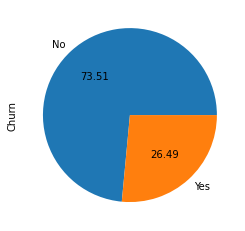

In [33]:
df["Churn"].value_counts().plot(kind="pie",autopct="%0.2f")
plt.show()

<AxesSubplot:>

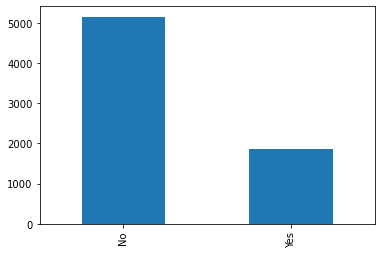

In [34]:
df["Churn"].value_counts().plot(kind="bar")

In [35]:
df

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,Male,0,Yes,24,DSL,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7006,Female,0,Yes,72,Fiber optic,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90,No
7007,Female,0,Yes,11,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7008,Male,1,No,4,Fiber optic,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
#!pip install imblearn

In [37]:
from imblearn.over_sampling import RandomOverSampler

In [38]:
X = df.drop("Churn",axis=1)
y = df['Churn']

In [39]:
OverS = RandomOverSampler()
X_Over, Y_Over = OverS.fit_resample(X, y)

In [40]:
Y_Over.shape

(10306,)

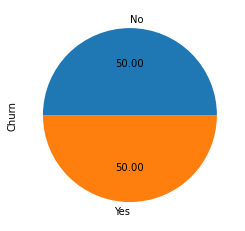

In [41]:
Y_Over.value_counts().plot(kind="pie",autopct="%0.2f")
plt.show()

In [42]:
X_Over["Churn"] = Y_Over

In [43]:
X_Over

,gender,SeniorCitizen,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10301,Female,0,No,10,Fiber optic,No,No,No,No,Month-to-month,No,Electronic check,86.45,830.85,Yes
10302,Male,1,Yes,56,Fiber optic,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),104.55,5794.65,Yes
10303,Female,0,No,16,Fiber optic,No,No,No,No,Month-to-month,No,Electronic check,72.65,1194.30,Yes
10304,Female,0,No,1,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,77.15,77.15,Yes


In [44]:
X_Over.to_csv("final_data.csv")
print("Final dataset")

Final dataset
